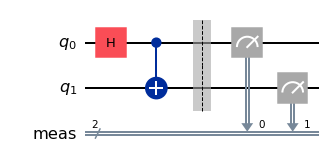

In [1]:
from qiskit.circuit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw('mpl', style={'name': 'iqx'})

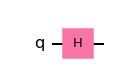

In [2]:
from qiskit.circuit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.h(0)

style_dict = {'displaycolor': {'h': ('#FA74A6', '#000000')}}
circuit.draw('mpl', style=style_dict)

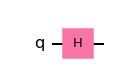

In [3]:
style_dict = {'displaycolor': {'h': '#FA74A6'}}
circuit.draw('mpl', style=style_dict)

In [4]:
from qiskit.circuit import classical_function, Int1

@classical_function
def grover_oracle(a: Int1, b: Int1, c: Int1, d: Int1) -> Int1:
     x = not a and b
     y = d and not c
     z = not x or y
     return z

quantum_circuit = grover_oracle.synth()
quantum_circuit.draw()

q_0: ──o────■────■────o────────────
       │    │    │    │            
q_1: ──o────o────┼────┼────■────o──
       │    │    │    │    │    │  
q_2: ──o────■────o────┼────■────┼──
       │    │    │    │    │    │  
q_3: ──■────┼────■────┼────■────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘

In [5]:
quantum_circuit = grover_oracle.synth(registerless=False)
quantum_circuit.draw()

d_0: ──o────■────■────o────────────
            │    │    │    │            
     c_0: ──o────o────┼────┼────■────o──
            │    │    │    │    │    │  
     b_0: ──o────■────o────┼────■────┼──
            │    │    │    │    │    │  
     a_0: ──■────┼────■────┼────■────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
return_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘└───┘└───┘

In [6]:
circuit = QuantumCircuit(5)
circuit.append(grover_oracle, range(5))
circuit.draw()

┌────────────────┐
q_0: ┤0               ├
     │                │
q_1: ┤1               ├
     │                │
q_2: ┤2 GROVER_ORACLE ├
     │                │
q_3: ┤3               ├
     │                │
q_4: ┤4               ├
     └────────────────┘

In [7]:
circuit.decompose().draw()

q_0: ──o────■────■────o────────────
       │    │    │    │            
q_1: ──o────o────┼────┼────■────o──
       │    │    │    │    │    │  
q_2: ──o────■────o────┼────■────┼──
       │    │    │    │    │    │  
q_3: ──■────┼────■────┼────■────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘└───┘

In [8]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.delay(500, 0, unit='ns')
qc.measure(0, 0)

qc.draw()

┌────────────────┐┌─┐
q_0: ┤ DELAY(500[ns]) ├┤M├
     └────────────────┘└╥┘
c: 1/═══════════════════╩═
                        0

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock.backends import FakeAthens

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

scheduled_circuit = transpile(qc, backend=FakeAthens(), scheduling_method="alap")
print("Duration in dt:", scheduled_circuit.duration)
scheduled_circuit.draw(idle_wires=False)

Duration in dt: 2016


┌─────────┐         
      q_0 -> 0 ────┤ U2(0,π) ├──────■──
                ┌──┴─────────┴───┐┌─┴─┐
      q_1 -> 1 ─┤ DELAY(160[dt]) ├┤ X ├
               ┌┴────────────────┤└───┘
ancilla_0 -> 2 ┤ DELAY(2016[dt]) ├─────
               ├─────────────────┤     
ancilla_1 -> 3 ┤ DELAY(2016[dt]) ├─────
               ├─────────────────┤     
ancilla_2 -> 4 ┤ DELAY(2016[dt]) ├─────
               └─────────────────┘

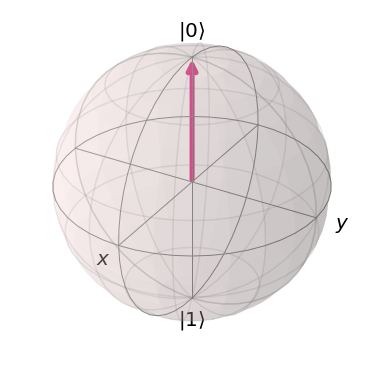

In [10]:
from numpy import pi

from qiskit.visualization import plot_bloch_vector

x = 0
y = 0
z = 1
r = 1
theta = pi
phi = 0


# Cartesian coordinates, where (x,y,z) are cartesian coordinates
# for bloch vector
plot_bloch_vector([x,y,z])

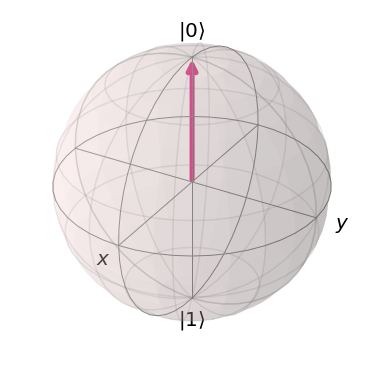

In [11]:
plot_bloch_vector([x,y,z], coord_type="cartesian")  # Same as line above

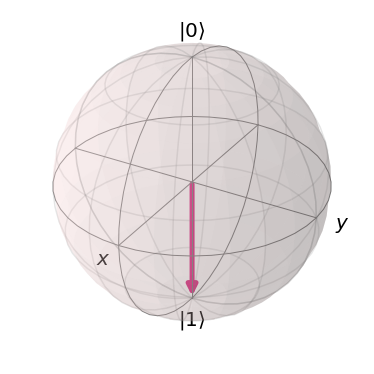

In [12]:
# Spherical coordinates, where (r,theta,phi) are spherical coordinates
# for bloch vector
plot_bloch_vector([r, theta, phi], coord_type="spherical")

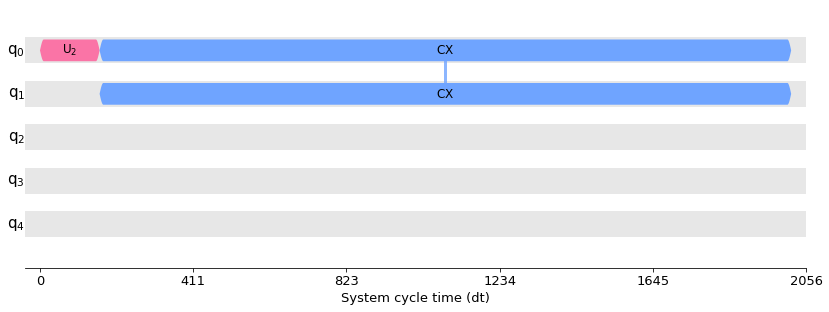

In [13]:
from qiskit.visualization import timeline_drawer
from qiskit import QuantumCircuit, transpile
from qiskit.test.mock import FakeAthens

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
timeline_drawer(transpile(qc, FakeAthens(), scheduling_method='alap'))

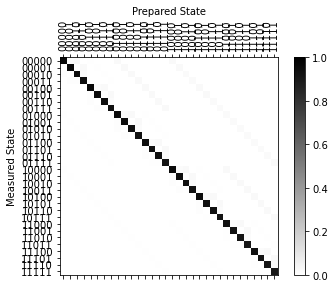

In [14]:
from qiskit import execute
from qiskit.test.mock import FakeVigo
import qiskit.ignis.mitigation as mit

backend = FakeVigo()
num_qubits = backend.configuration().num_qubits

# Generate calibration circuits
circuits, metadata = mit.expval_meas_mitigator_circuits(
    num_qubits, method='tensored')
result = execute(circuits, backend, shots=8192).result()

# Fit mitigator
mitigator = mit.ExpvalMeasMitigatorFitter(result, metadata).fit()

# Plot fitted N-qubit assignment matrix
mitigator.plot_assignment_matrix()

In [15]:
from qiskit import QuantumCircuit

# Test Circuit with expectation value -1.
qc = QuantumCircuit(num_qubits)
qc.x(range(num_qubits))
qc.measure_all()

# Execute
shots = 8192
seed_simulator = 1999
result = execute(qc, backend, shots=8192, seed_simulator=1999).result()
counts = result.get_counts(0)

# Expectation value of Z^N without mitigation
expval_nomit, error_nomit = mit.expectation_value(counts)
print('Expval (no mitigation): {:.2f} \u00B1 {:.2f}'.format(
    expval_nomit, error_nomit))

# Expectation value of Z^N with mitigation
expval_mit, error_mit = mit.expectation_value(counts,
    meas_mitigator=mitigator)
print('Expval (with mitigation): {:.2f} \u00B1 {:.2f}'.format(
    expval_mit, error_mit))

Expval (no mitigation): -0.81 ± 0.01
Expval (with mitigation): -0.99 ± 0.01


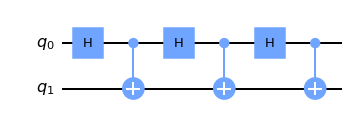

In [16]:
from qiskit.circuit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
repeated_qc = qc.repeat(3)
repeated_qc.decompose().draw(output='mpl')

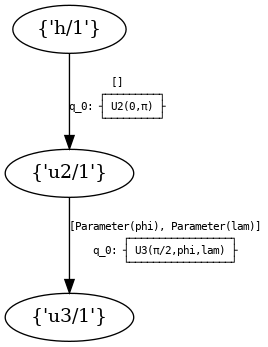

In [17]:
from numpy import pi

from qiskit.circuit import EquivalenceLibrary
from qiskit.circuit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.circuit import Parameter
from qiskit.circuit.library import HGate
from qiskit.circuit.library import U2Gate
from qiskit.circuit.library import U3Gate

my_equiv_library = EquivalenceLibrary()

q = QuantumRegister(1, 'q')
def_h = QuantumCircuit(q)
def_h.append(U2Gate(0, pi), [q[0]], [])
my_equiv_library.add_equivalence(HGate(), def_h)

theta = Parameter('theta')
phi = Parameter('phi')
lam = Parameter('lam')
def_u2 = QuantumCircuit(q)
def_u2.append(U3Gate(pi / 2, phi, lam), [q[0]], [])
my_equiv_library.add_equivalence(U2Gate(phi, lam), def_u2)

my_equiv_library.draw()

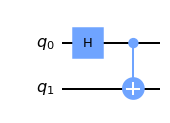

In [18]:
from qiskit.circuit import QuantumCircuit

circ1 = QuantumCircuit(2)
circ2 = QuantumCircuit(2)

circ2.h(0)
circ1.cx(0, 1)

circ1.compose(circ2, front=True).draw(output='mpl')

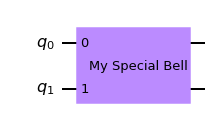

In [19]:
from qiskit.circuit import QuantumCircuit

circuit_gate = QuantumCircuit(2)
circuit_gate.h(0)
circuit_gate.cx(0, 1)
custom_gate = circuit_gate.to_gate(label='My Special Bell')
new_circ = QuantumCircuit(2)
new_circ.append(custom_gate, [0, 1], [])
new_circ.draw(output='mpl')

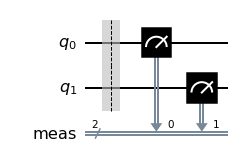

In [20]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.measure_all()
circuit.draw(output='mpl', cregbundle=True)

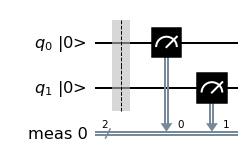

In [21]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.measure_all()
circuit.draw(output='mpl', initial_state=True)

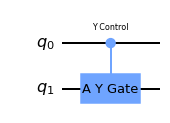

In [22]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import YGate
circuit = QuantumCircuit(2)
circuit.append(YGate(label='A Y Gate').control(label='Y Control'), [0, 1])
circuit.draw(output='mpl')

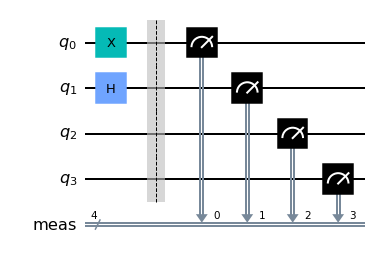

In [23]:
from qiskit.circuit import QuantumCircuit

circ = QuantumCircuit(4)
circ.x(0)
circ.h(1)
circ.measure_all()
circ.draw(output='mpl')

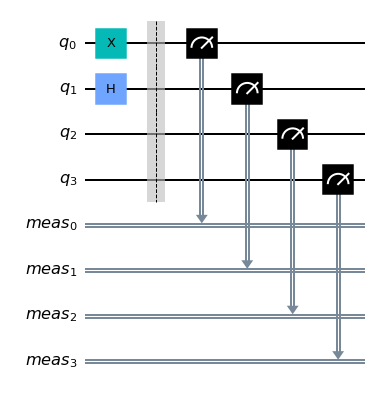

In [24]:
from qiskit.circuit import QuantumCircuit

circ = QuantumCircuit(4)
circ.x(0)
circ.h(1)
circ.measure_all()
circ.draw(output='mpl', cregbundle=False)

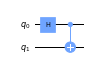

In [25]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl', scale=0.5)

In [26]:
from qiskit.circuit.library import XOR
import qiskit.tools.jupyter
circuit = XOR(5, seed=42)
%circuit_library_info circuit

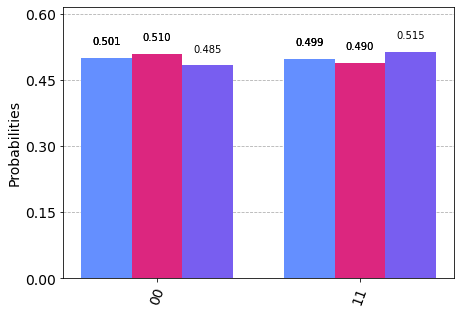

In [27]:
from qiskit import execute
from qiskit import QuantumCircuit
from qiskit.providers.basicaer import BasicAer
from qiskit.visualization import plot_histogram

sim = BasicAer.get_backend('qasm_simulator')

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
result = execute([qc, qc, qc], sim).result()

plot_histogram(result.get_counts())

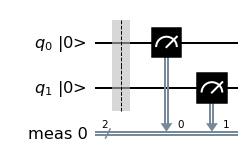

In [28]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.measure_all()
circuit.draw(output='mpl', initial_state=True)

In [29]:
from qiskit.quantum_info import Statevector

state = Statevector.from_label('+0')
print(state.to_dict())

{'00': (0.7071067811865475+0j), '10': (0.7071067811865475+0j)}


In [30]:
from qiskit.quantum_info import DensityMatrix

state = DensityMatrix.from_label('+0')
print(state.to_dict())

{'00|00': (0.4999999999999999+0j), '10|00': (0.4999999999999999+0j), '00|10': (0.4999999999999999+0j), '10|10': (0.4999999999999999+0j)}


In [31]:
from qiskit.quantum_info import Statevector

state = Statevector.from_label('+0')
print(state.probabilities())

[0.5 0.  0.5 0. ]


In [32]:
from qiskit.quantum_info import DensityMatrix

state = DensityMatrix.from_label('+0')
print(state.probabilities())

[0.5 0.  0.5 0. ]


In [33]:
from qiskit.quantum_info import Statevector

state = Statevector.from_label('+0')
print(state.probabilities_dict())

{'00': 0.4999999999999999, '10': 0.4999999999999999}


In [34]:
from qiskit.quantum_info import DensityMatrix

state = DensityMatrix.from_label('+0')
print(state.probabilities_dict())

{'00': 0.4999999999999999, '10': 0.4999999999999999}


In [35]:
from qiskit.quantum_info import Statevector

psi = Statevector.from_label('+0')
shots = 1024

# Sample counts dictionary
counts = psi.sample_counts(shots)
print('Measure both:', counts)

# Qubit-0
counts0 = psi.sample_counts(shots, [0])
print('Measure Qubit-0:', counts0)

# Qubit-1
counts1 = psi.sample_counts(shots, [1])
print('Measure Qubit-1:', counts1)

Measure both: {'00': 521, '10': 503}
Measure Qubit-0: {'0': 1024}
Measure Qubit-1: {'0': 520, '1': 504}


In [36]:
from qiskit.quantum_info import Statevector

psi = Statevector.from_label('-1')
shots = 10

# Sample memory
mem = psi.sample_memory(shots)
print('Measure both:', mem)

# Qubit-0
mem0 = psi.sample_memory(shots, [0])
print('Measure Qubit-0:', mem0)

# Qubit-1
mem1 = psi.sample_memory(shots, [1])
print('Measure Qubit-1:', mem1)

Measure both: ['11' '01' '01' '11' '11' '11' '01' '01' '11' '11']
Measure Qubit-0: ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
Measure Qubit-1: ['0' '0' '1' '1' '0' '0' '1' '0' '0' '1']


In [37]:
from qiskit.quantum_info import Statevector

psi = Statevector.from_label('+1')

# Measure both qubits
outcome, psi_meas = psi.measure()
print("measure([0, 1]) outcome:", outcome, "Post-measurement state:")
print(psi_meas)

# Measure qubit-1 only
outcome, psi_meas = psi.measure([1])
print("measure([1]) outcome:", outcome, "Post-measurement state:")
print(psi_meas)

measure([0, 1]) outcome: 01 Post-measurement state:
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
measure([1]) outcome: 1 Post-measurement state:
Statevector([-0.+0.j,  0.+0.j, -0.+0.j,  1.+0.j],
            dims=(2, 2))


In [38]:
from qiskit.quantum_info import Statevector

psi = Statevector.from_label('+1')

# Reset both qubits
psi_reset = psi.reset()
print("Post reset state: ")
print(psi_reset)

# Reset qubit-1 only
psi_reset = psi.reset([1])
print("Post reset([1]) state: ")
print(psi_reset)

Post reset state: 
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Post reset([1]) state: 
Statevector([-0.+0.j,  1.+0.j, -0.+0.j,  0.+0.j],
            dims=(2, 2))


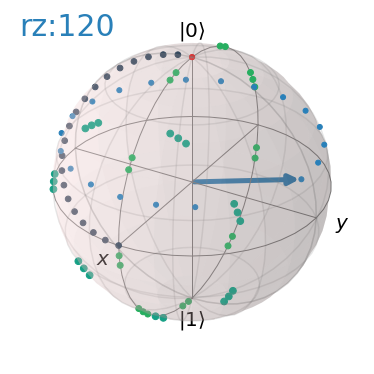

In [39]:
from qiskit.visualization import visualize_transition
from qiskit import *

qc = QuantumCircuit(1)
qc.h(0)
qc.ry(70,0)
qc.rx(90,0)
qc.rz(120,0)

visualize_transition(qc, fpg=20, spg=1, trace=True)

In [40]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.measure_all()
circuit.draw(output='text')

░ ┌─┐   
   q_0: ─░─┤M├───
         ░ └╥┘┌─┐
   q_1: ─░──╫─┤M├
         ░  ║ └╥┘
meas: 2/════╩══╩═
            0  1

In [41]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.measure_all()
circuit.draw(output='text', initial_state=True)

░ ┌─┐   
  q_0: |0>─░─┤M├───
           ░ └╥┘┌─┐
  q_1: |0>─░──╫─┤M├
           ░  ║ └╥┘
meas: 0 2/════╩══╩═
              0  1

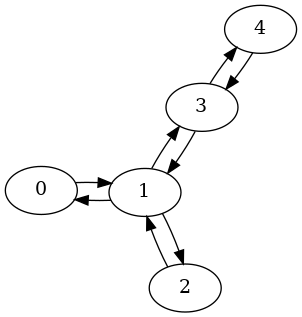

In [42]:
from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap(
    [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]])
coupling_map.draw()

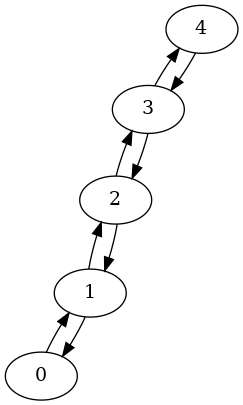

In [43]:
from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap.from_line(5)
coupling_map.draw()

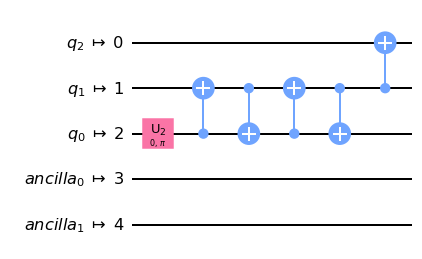

In [44]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.test.mock import FakeVigo

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
transpiled_qc = transpile(qc, FakeVigo())
transpiled_qc.draw(output='mpl')

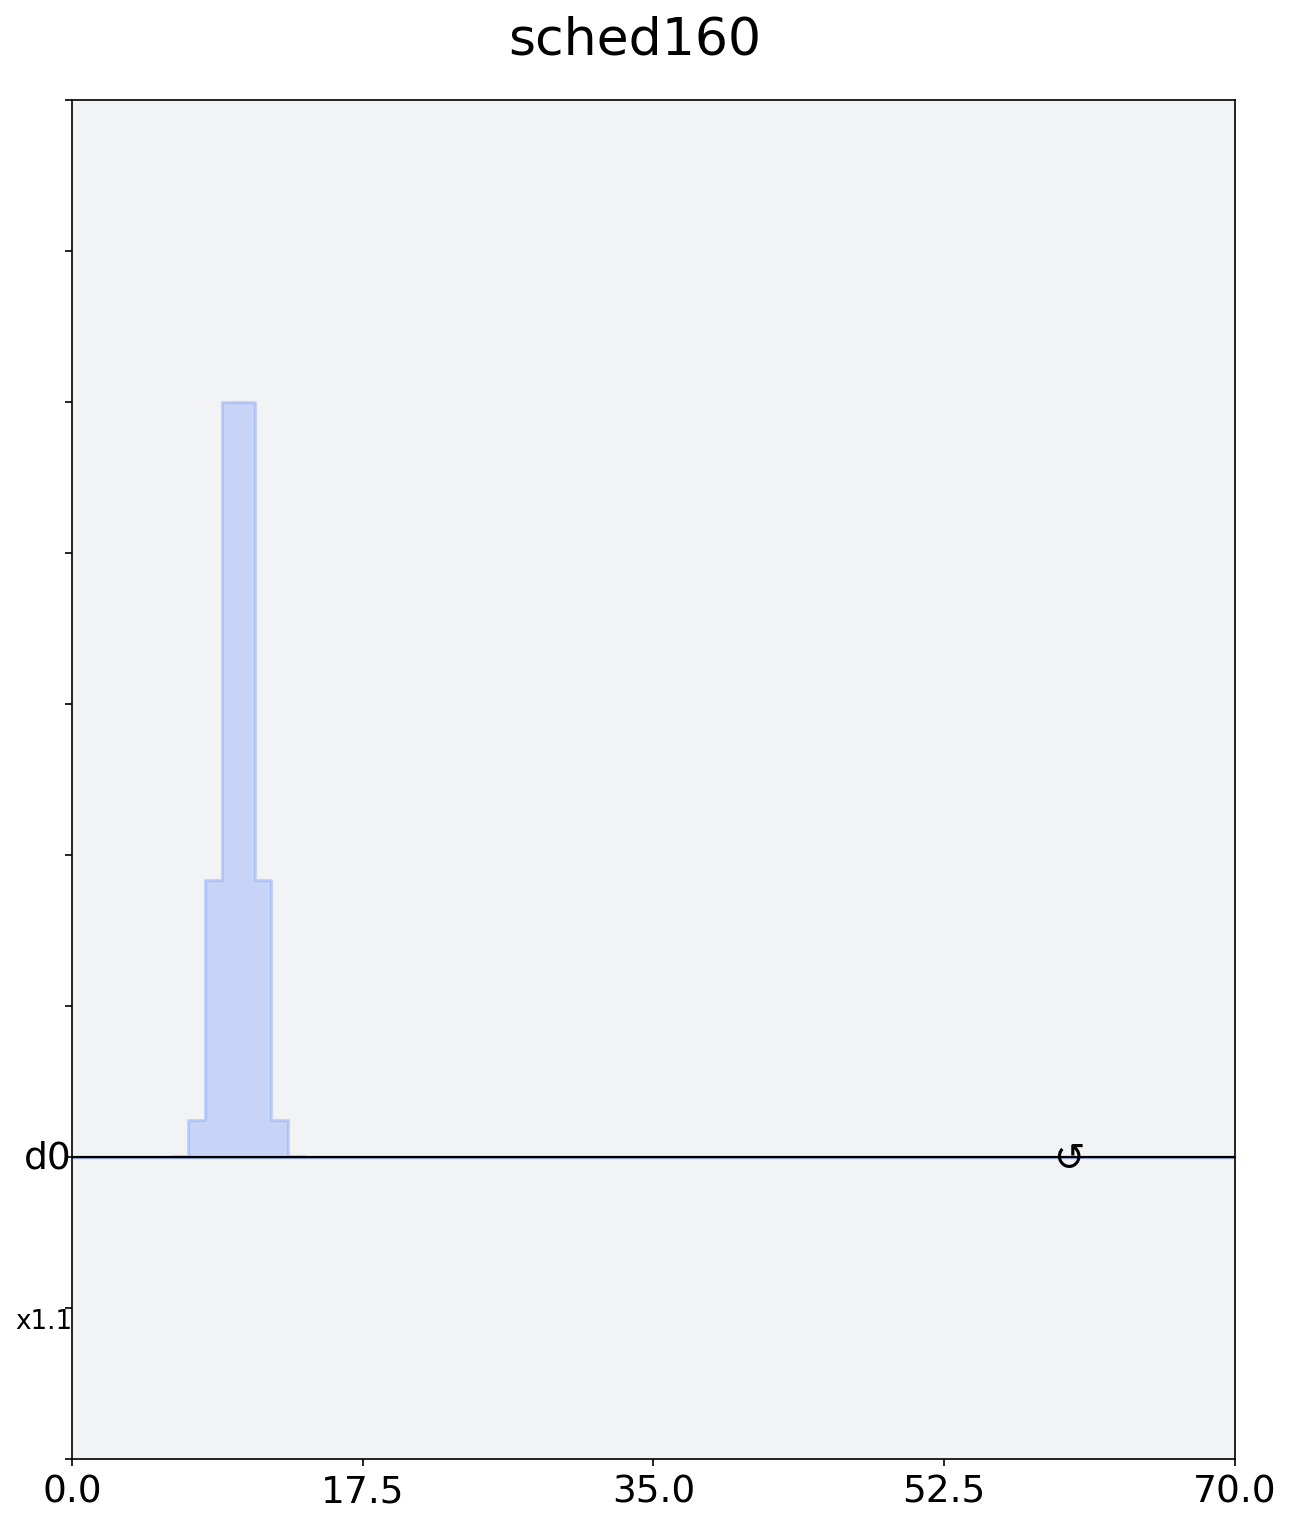

In [45]:
from qiskit.pulse import *
from qiskit.pulse import library as pulse_lib

gp0 = pulse_lib.gaussian(duration=20, amp=1.0, sigma=1.0)
sched = Schedule()
channel_a = DriveChannel(0)
channel_b = DriveChannel(1)
sched += Play(gp0, channel_a)
sched = sched.insert(60, ShiftPhase(-1.57, channel_a))
sched = sched.insert(30, ShiftPhase(-1.50, channel_b))
sched = sched.insert(70, ShiftPhase(1.50, channel_b))

sched.draw(show_framechange_channels=False)